In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [20]:
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns

In [14]:
import pandas as pd
data_df=pd.read_csv('data.csv', encoding='unicode_escape', sep=";")

pd.set_option ('display.max_columns', 500)

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   InvoiceNo    541909 non-null  object
 1   StockCode    541909 non-null  object
 2   Description  540455 non-null  object
 3   Quantity     541909 non-null  object
 4   InvoiceDate  541909 non-null  object
 5   UnitPrice    541909 non-null  object
 6   CustomerID   408518 non-null  object
 7   Country      540544 non-null  object
 8   Unnamed: 8   4472 non-null    object
 9   Unnamed: 9   1067 non-null    object
dtypes: object(10)
memory usage: 41.3+ MB


In [16]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   InvoiceNo    541909 non-null  object
 1   StockCode    541909 non-null  object
 2   Description  540455 non-null  object
 3   Quantity     541909 non-null  object
 4   InvoiceDate  541909 non-null  object
 5   UnitPrice    541909 non-null  object
 6   CustomerID   408518 non-null  object
 7   Country      540544 non-null  object
 8   Unnamed: 8   4472 non-null    object
 9   Unnamed: 9   1067 non-null    object
dtypes: object(10)
memory usage: 41.3+ MB


In [17]:
data_df.head(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8,Unnamed: 9
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12.01.2010 08:26,2.55,17850,United Kingdom,NaN,NaN
1,536365,71053,WHITE METAL LANTERN,6,12.01.2010 08:26,3.39,17850,United Kingdom,NaN,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12.01.2010 08:26,2.75,17850,United Kingdom,NaN,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12.01.2010 08:26,3.39,17850,United Kingdom,NaN,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12.01.2010 08:26,3.39,17850,United Kingdom,NaN,NaN
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12.01.2010 08:26,7.65,17850,United Kingdom,NaN,NaN
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12.01.2010 08:26,4.25,17850,United Kingdom,NaN,NaN
7,536366,22633,HAND WARMER UNION JACK,6,12.01.2010 08:28,1.85,17850,United Kingdom,NaN,NaN
8,536366,22632,HAND WARMER RED POLKA DOT,6,12.01.2010 08:28,1.85,17850,United Kingdom,NaN,NaN
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12.01.2010 08:34,1.69,13047,United Kingdom,NaN,NaN


In [27]:
data_df['InvoiceDate'] = pd.to_datetime(data_df['InvoiceDate'])
data_df.CustomerID=data_df.CustomerID.astype(object)
data_df.info()

ValueError: ignored

In [28]:
data_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133391
Country          1365
Unnamed: 8     537437
Unnamed: 9     540842
dtype: int64

In [29]:
data_df.isnull().sum() / data_df.shape[0] * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.615018
Country         0.251887
Unnamed: 8     99.174769
Unnamed: 9     99.803103
dtype: float64

In [30]:
pd.set_option('display.max_rows', 1000)
null_data = data_df[data_df.isnull().any(axis=1)]
null_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541166 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   InvoiceNo    541166 non-null  object
 1   StockCode    541166 non-null  object
 2   Description  539712 non-null  object
 3   Quantity     541166 non-null  object
 4   InvoiceDate  541166 non-null  object
 5   UnitPrice    541166 non-null  object
 6   CustomerID   407775 non-null  object
 7   Country      539801 non-null  object
 8   Unnamed: 8   3729 non-null    object
 9   Unnamed: 9   324 non-null     object
dtypes: object(10)
memory usage: 45.4+ MB


In [31]:
null_data = data_df[data_df['Description'].isnull()]
null_data.sample(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8,Unnamed: 9
326551,565545,20973,NaN,1,09.05.2011 12:09,0,NaN,United Kingdom,NaN,NaN
147793,549138,22988,NaN,12,04.06.2011 15:25,0,NaN,United Kingdom,NaN,NaN
169160,551168,85068,NaN,-4,4/26/2011 16:06,0,NaN,United Kingdom,NaN,NaN
381685,569884,90164B,NaN,-14,10.06.2011 15:16,0,NaN,United Kingdom,NaN,NaN
314906,564667,23084,NaN,-400,8/26/2011 15:08,0,NaN,United Kingdom,NaN,NaN
273747,560857,35819P,NaN,108,7/21/2011 13:21,0,NaN,United Kingdom,NaN,NaN
51048,540637,21275,NaN,-5,01.10.2011 12:13,0,NaN,United Kingdom,NaN,NaN
171730,551456,22795,NaN,-3,4/28/2011 16:03,0,NaN,United Kingdom,NaN,NaN
146981,549032,20778,NaN,-6,04.05.2011 17:06,0,NaN,United Kingdom,NaN,NaN
139595,548328,21527,NaN,-21,3/30/2011 13:11,0,NaN,United Kingdom,NaN,NaN


In [32]:
data_df=data_df.dropna()
data_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Unnamed: 8     0
Unnamed: 9     0
dtype: int64

In [39]:
data_df["IsCancelled"]=np.where(data_df.InvoiceNo.apply(lambda l: l[0]=="C"), True, False)
data_df.IsCancelled.value_counts() / data_df.shape[0] * 100

False    100.0
Name: IsCancelled, dtype: float64

In [40]:
data_df.loc[data_df.IsCancelled==True].describe()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8,Unnamed: 9,IsCancelled
count,0,0,0,0,0,0,0,0,0,0,0
unique,0,0,0,0,0,0,0,0,0,0,0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
data_df = data_df.loc[data_df.IsCancelled==False].copy()
data_df = data_df.drop("IsCancelled", axis=1)

AttributeError: ignored

In [46]:
data_df.StockCode.nunique(), data_df.Description.nunique()

(13, 11)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


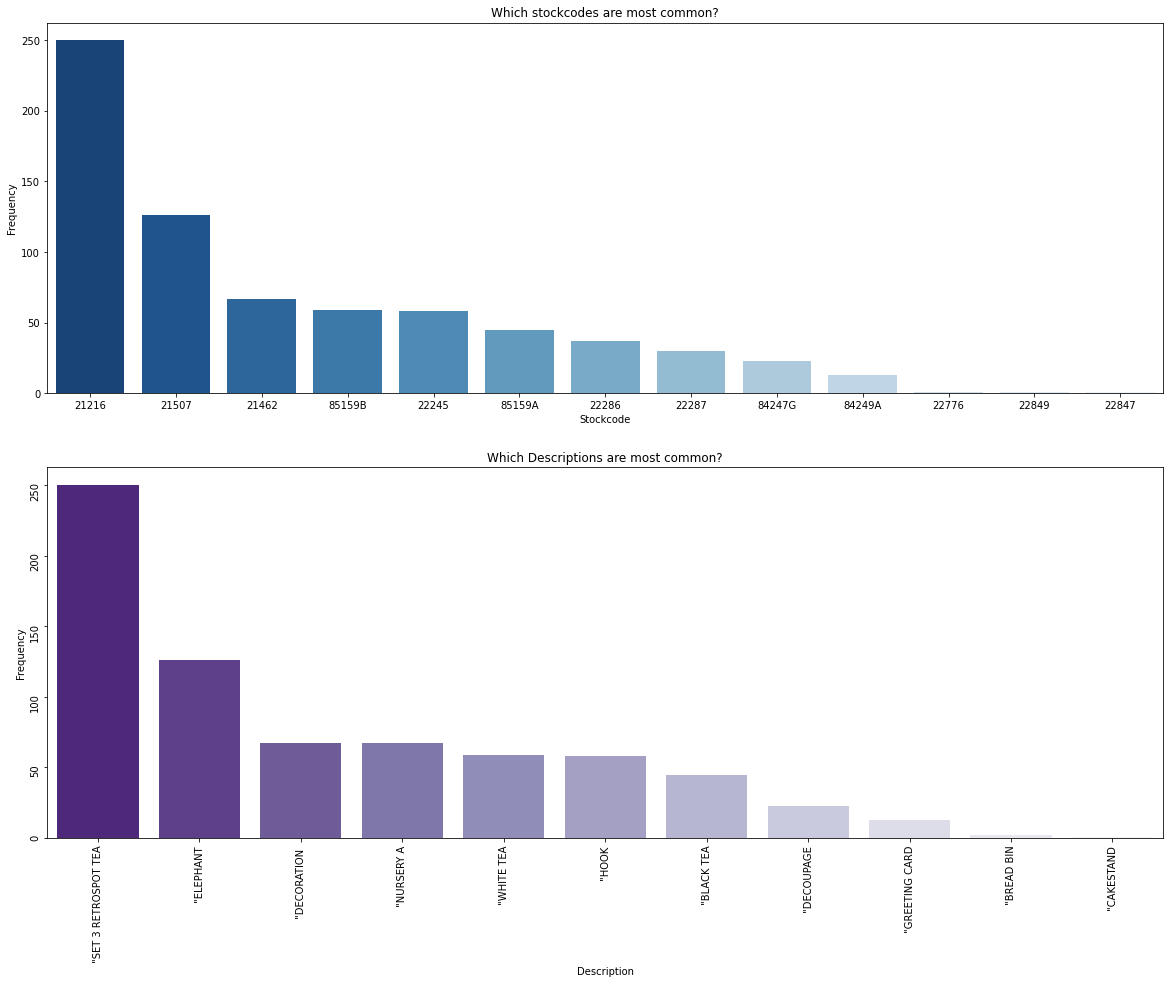

In [47]:
stockcode_frequency = data_df.StockCode.value_counts().sort_values(ascending=False)
description_frequency = data_df.Description.value_counts().sort_values(ascending=False)
fig, ax = plt.subplots(2,1,figsize=(20,15))
sns.barplot(stockcode_frequency.iloc[0:19].index,
            stockcode_frequency.iloc[0:19].values,
            ax = ax[0], palette="Blues_r")
ax[0].set_ylabel("Frequency")
ax[0].set_xlabel("Stockcode")
ax[0].set_title("Which stockcodes are most common?");
sns.barplot(description_frequency.iloc[0:19].index,
            description_frequency.iloc[0:19].values,
            ax = ax[1], palette="Purples_r")
ax[1].set_ylabel("Frequency")
ax[1].set_xlabel("Description")
ax[1].tick_params(labelrotation=90)

ax[1].set_title("Which Descriptions are most common?");

In [49]:
customer_frequency = data_df.CustomerID.value_counts().sort_values(ascending=False).iloc[0:19] 
plt.figure(figsize=(19,10))
customer_frequency.index = customer_frequency.index.astype('Int64') 
sns.barplot(customer_frequency.index, customer_frequency.values, order=customer_frequency.index, palette="Spectral_r")
plt.ylabel("Frequency")
plt.xlabel("CustomerID")
plt.title("Which customers are most common?");

TypeError: ignored

<Figure size 1368x720 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


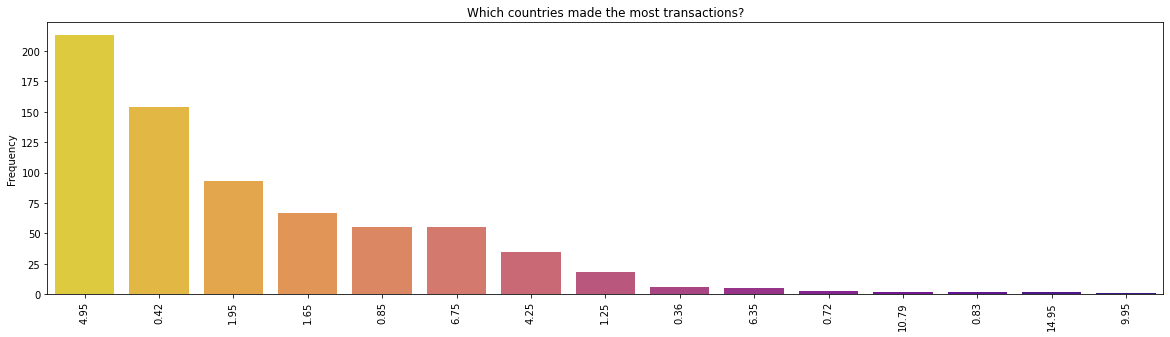

In [50]:
country_frequency = data_df.Country.value_counts().sort_values(ascending=False).iloc[0:20]
plt.figure(figsize=(20,5))
sns.barplot(country_frequency.index, country_frequency.values, palette="plasma_r")
plt.ylabel("Frequency")
plt.title("Which countries made the most transactions?");
plt.xticks(rotation=90);

In [52]:
x = data_df.groupby(['CustomerID','Country']).size().sort_values(ascending=False).iloc[0:19]
pd.DataFrame(x)

,,0
CustomerID,Country,
1/16/2011 13:25,1.65,3
3/24/2011 12:11,1.65,3
9/28/2011 15:50,4.95,3
12/2/2010 18:25,0.42,2
3/14/2011 12:58,1.65,2
3/10/2011 10:53,1.65,2
11/6/2011 16:07,1.95,2
4/15/2011 14:21,0.85,2
6/30/2011 20:08,0.42,2


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


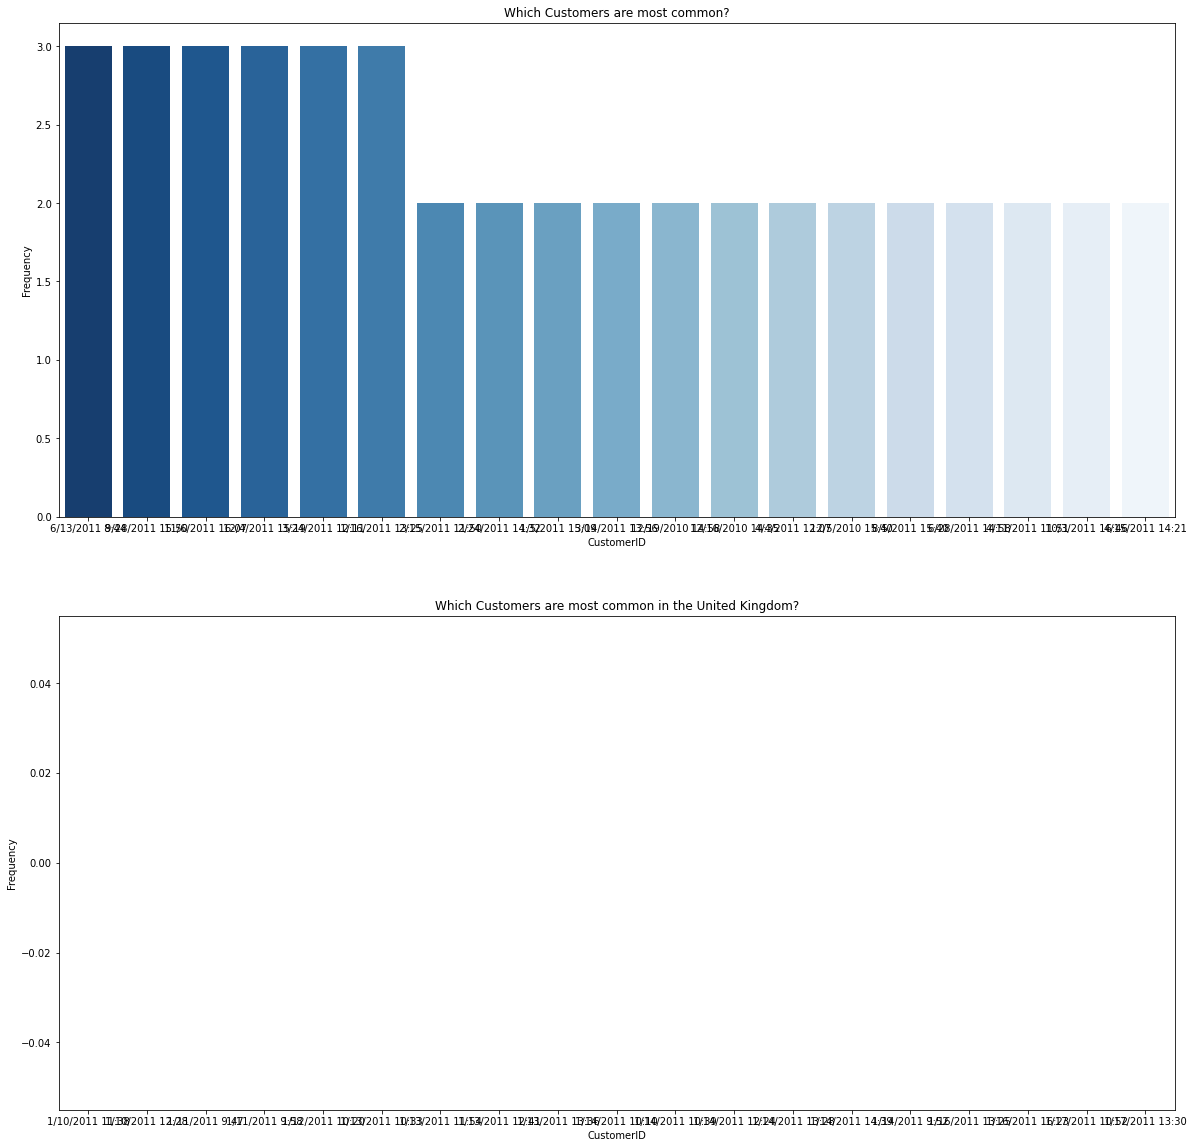

In [53]:
customer_frequency = data_df.CustomerID.value_counts().sort_values(ascending=False).iloc[0:19] 
uk_customers = data_df.groupby(data_df['CustomerID']).size().where(data_df['Country'] == 'United Kingdom').sort_values(ascending=False).iloc[0:19]
fig, ax = plt.subplots(2,1,figsize=(20,20))
sns.barplot(customer_frequency.index,
            customer_frequency.values,
            ax = ax[0], palette="Blues_r", order=customer_frequency.index)
ax[0].set_ylabel("Frequency")
ax[0].set_xlabel("CustomerID")
ax[0].set_title("Which Customers are most common?");
sns.barplot(uk_customers.index,
            uk_customers.values,
            ax = ax[1], palette="cool", order=uk_customers.index)
ax[1].set_ylabel("Frequency")
ax[1].set_xlabel("CustomerID")
ax[1].set_title("Which Customers are most common in the United Kingdom?");

In [55]:
data_df.UnitPrice.describe()

count     711
unique     21
top        12
freq      254
Name: UnitPrice, dtype: object

In [56]:
data_df=data_df.loc[data_df.UnitPrice > 0].copy()

TypeError: ignored

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


TypeError: ignored

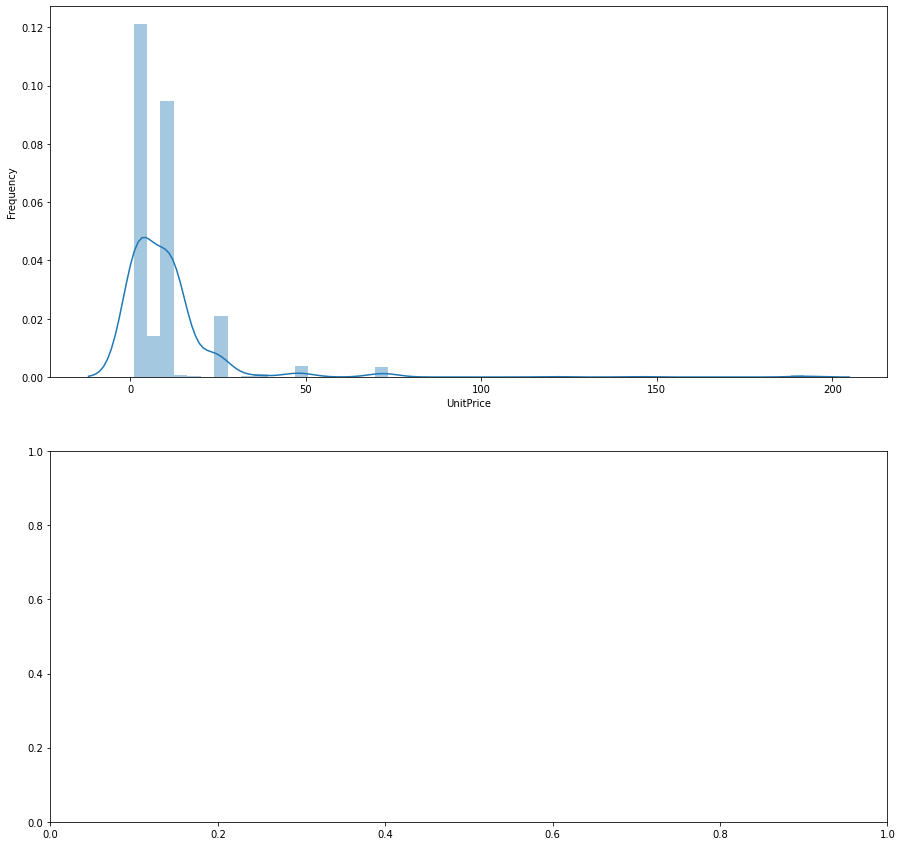

In [58]:
fig, ax = plt.subplots(2,1,figsize=(15,15))
sns.distplot(data_df.UnitPrice, ax=ax[0])
ax[0].set_ylabel('Frequency')
sns.distplot(np.log(data_df.UnitPrice), ax=ax[1], bins=20)
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel("Log-Unit-Price");

In [59]:
np.exp(-2),np.exp(3)

(0.1353352832366127, 20.085536923187668)

In [60]:
data_df = data_df.loc[(data_df.UnitPrice > 0.1) & (data_df.UnitPrice < 20)].copy()

TypeError: ignored

In [61]:
data_df.UnitPrice.describe()

count     711
unique     21
top        12
freq      254
Name: UnitPrice, dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


TypeError: ignored

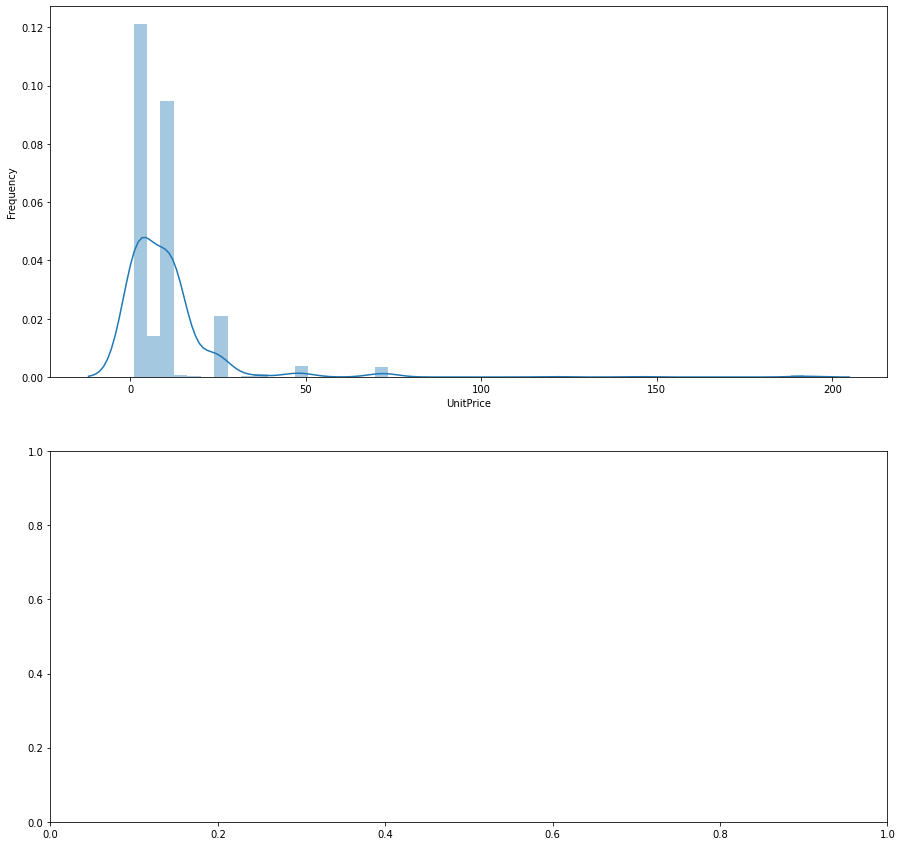

In [62]:
fig, ax = plt.subplots(2,1,figsize=(15,15))
sns.distplot(data_df.UnitPrice, ax=ax[0])
ax[0].set_ylabel('Frequency')
sns.distplot(np.log(data_df.UnitPrice), ax=ax[1], bins=20)
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel("Log-Unit-Price");

In [63]:
data_df.Quantity.describe()

count        711
unique        10
top       COFFEE
freq         354
Name: Quantity, dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: ignored

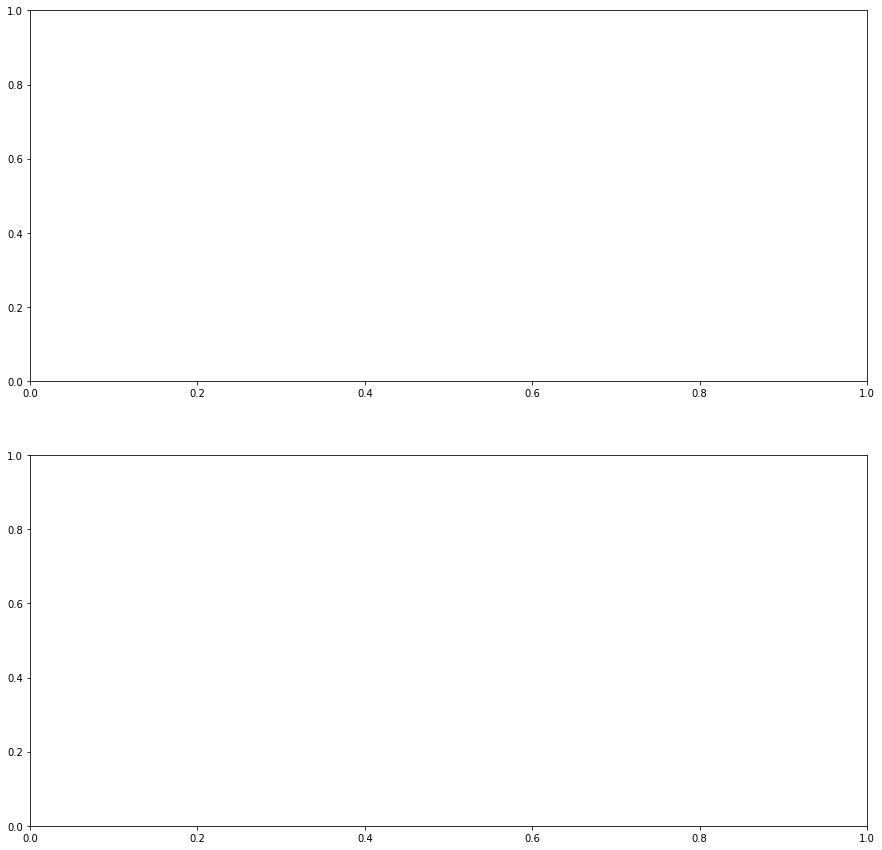

In [64]:
fig, ax = plt.subplots(2,1,figsize=(15,15))
sns.distplot(data_df.Quantity, ax=ax[0], kde=False)
ax[0].set_title("Quantity distribution")
ax[0].set_ylabel('Frequency')
ax[0].set_yscale("log")
sns.distplot(np.log(data_df.Quantity), ax=ax[1], bins=20, kde=False)
ax[0].set_title("Log-Quantity distribution")
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel("Log-Quantity");

In [66]:
np.exp(4),np.quantile(data_df.Quantity, 0.95)

TypeError: ignored

In [67]:
data_df = data_df.loc[data_df.Quantity < 55].copy()

TypeError: ignored

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: ignored

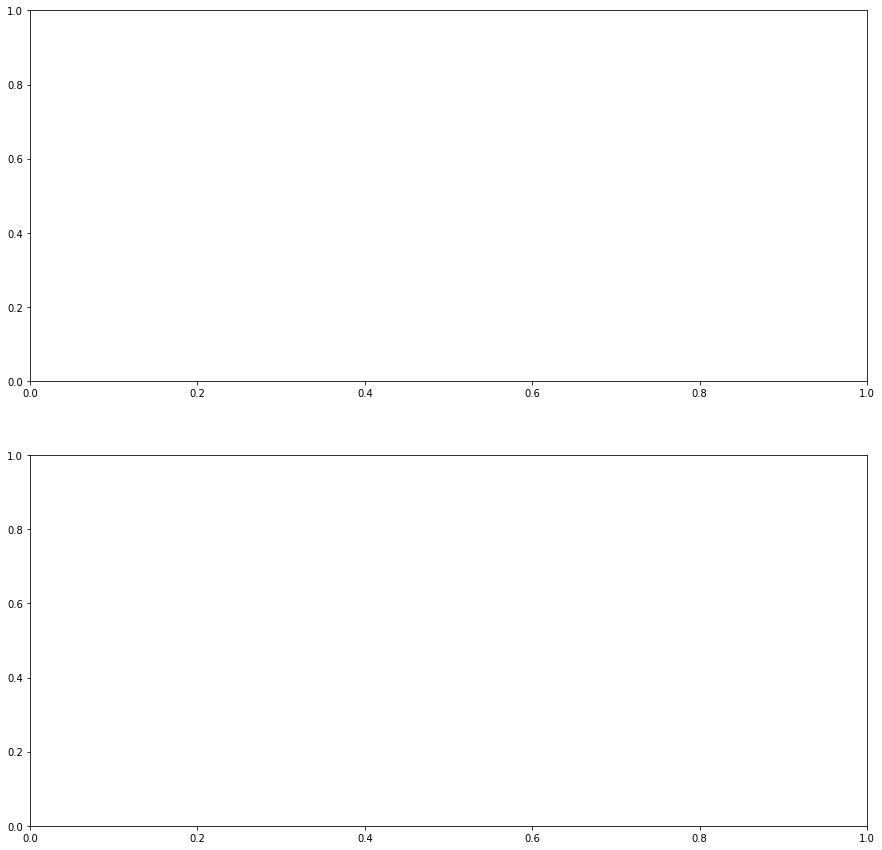

In [68]:
fig, ax = plt.subplots(2,1,figsize=(15,15))
sns.distplot(data_df.Quantity, ax=ax[0], kde=False)
ax[0].set_title("Quantity distribution")
ax[0].set_ylabel('Frequency')
ax[0].set_yscale("log")
sns.distplot(np.log(data_df.Quantity), ax=ax[1], bins=20, kde=False)
ax[0].set_title("Log-Quantity distribution")
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel("Log-Quantity");


In [69]:
data_df.Quantity.describe()

count        711
unique        10
top       COFFEE
freq         354
Name: Quantity, dtype: object

In [70]:
data_df["Revenue"] = data_df.Quantity * data_df.UnitPrice

data_df["Month"] = data_df.InvoiceDate.dt.month

data_df.groupby('Month').sum().sort_values(by='Revenue', ascending=False)

TypeError: ignored

In [72]:
plt.rcParams.update({'font.size': 12})
z = data_df.groupby('Month').sum().sort_values(by='Revenue',ascending=False)
x = z.index
y = z['Revenue'].sort_values(ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(x, y, order=x)
plt.ylabel("Revenue", Size=14)
plt.xlabel("Months", Size=14)
plt.title("Which Month had the highest Revenue?", Size=14);

KeyError: ignored

In [73]:
df = data_df[['StockCode','Revenue']].groupby('StockCode').sum().sort_values(by='Revenue', ascending=False).iloc[0:9]
df

KeyError: ignored

In [74]:
data_df[data_df['StockCode'] == '22423'].sample(10)

ValueError: ignored